In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

# Load the data
data = pd.read_csv('./monthly_sales.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)



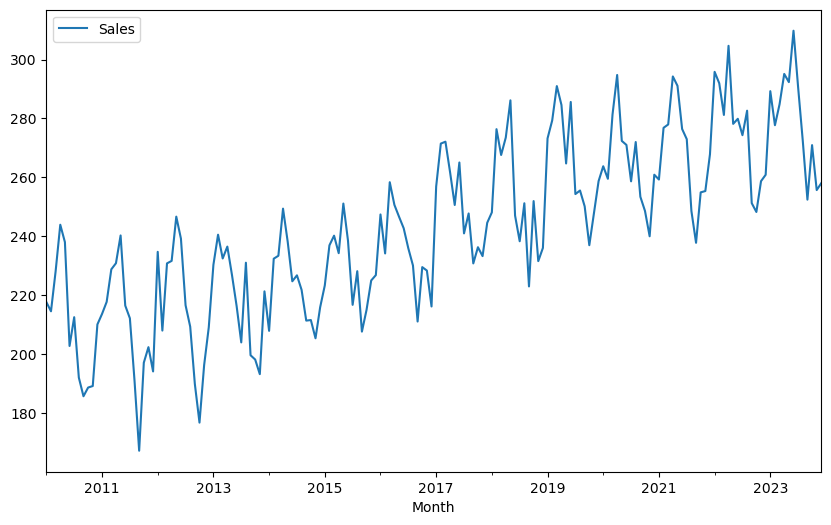

In [3]:
# Visualize the data
data.plot(figsize=(10, 6))
plt.show()



In [4]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)



In [5]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)



In [6]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [7]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, 1)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



/home/nivedita/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 12, 100)        │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,301 (317.58 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)



Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1426 - val_loss: 0.0223
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0307 - val_loss: 0.0138
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208 - val_loss: 0.0310
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0175 - val_loss: 0.0139
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - val_loss: 0.0142
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0213 - val_loss: 0.0196
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - val_loss: 0.0156
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0173 - val_loss: 0.0132
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158 - val_loss: 0.0127
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0166 - val_loss: 0.0167
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0161 - val_loss: 0.0133
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - val_loss: 0.0117
Epoch 

In [9]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114
Test Loss: 0.01143973134458065


In [10]:
# Predict on the test data
predictions = model.predict(X_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [11]:
# Inverse transform the predictions and the actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)



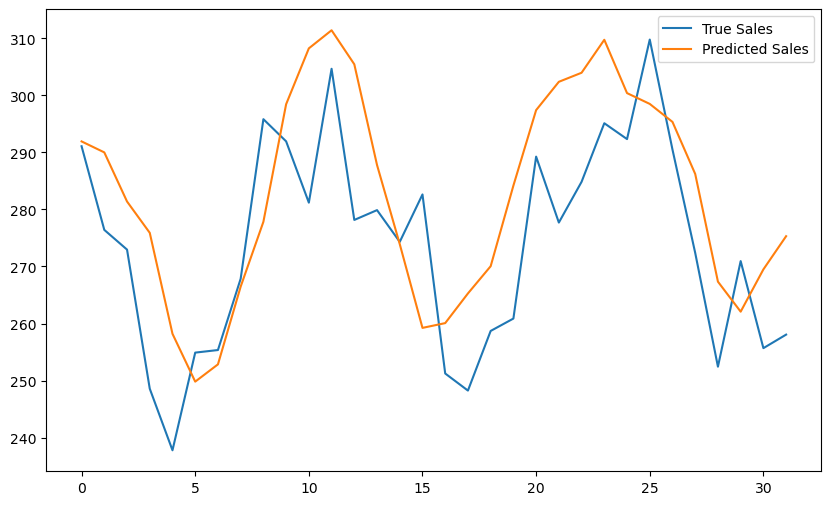

In [12]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Sales')
plt.plot(predictions, label='Predicted Sales')
plt.legend()
plt.show()
